## PROYECTO INDIVIDUAL Nº2
### Telecomunicaciones
#### JUAN CAMILO CANDELA - COL

In [1]:
# Librerias necesarias para nuestra EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import pandas as pd

# Cargar la hoja 'Penetración-hogares' del archivo Internet.xlsx
df_hogares = pd.read_excel('data/Internet.xlsx', sheet_name='Penetracion-hogares')

# Cargar otras hojas si es necesario
df_poblacion = pd.read_excel('data/Internet.xlsx', sheet_name='Penetración-poblacion')
df_totales = pd.read_excel('data/Internet.xlsx', sheet_name='Penetracion-totales')

# Visualizar las primeras filas de cada DataFrame para inspeccionar los datos
#df_hogares.head()
#df_poblacion.head()
df_totales.head()


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.89,24.79,Ene-Mar 2024
1,2023,4,78.56,24.66,Oct-Dic 2023
2,2023,3,77.84,24.41,Jul-Sept 2023
3,2023,2,77.02,24.14,Abr-Jun 2023
4,2023,1,77.20,24.17,Ene-Mar 2023


In [27]:
# Exportar df_hogares a un archivo CSV
df_hogares.to_csv('df_hogares.csv', index=False)


### Valores Faltantes:

Asegurar la Integridad de los Datos: Mantiene la calidad y precisión de la información.

Mejorar el Análisis: Evita resultados incorrectos o sesgados.

Tomar Decisiones Informadas: Garantiza que las decisiones basadas en datos sean confiables.

In [9]:
# Búsqueda de Valores Faltantes
# Verificar valores faltantes en df_hogares
missing_hogares = df_hogares.isnull().sum()
percent_missing_hogares = (missing_hogares / len(df_hogares)) * 100

print("Valores faltantes en df_hogares:")
print(missing_hogares)
print("Porcentaje de valores faltantes en df_hogares:")
print(percent_missing_hogares)

# Verificar valores faltantes en df_poblacion
missing_poblacion = df_poblacion.isnull().sum()
percent_missing_poblacion = (missing_poblacion / len(df_poblacion)) * 100

print("\nValores faltantes en df_poblacion:")
print(missing_poblacion)
print("Porcentaje de valores faltantes en df_poblacion:")
print(percent_missing_poblacion)

# Verificar valores faltantes en df_totales
missing_totales = df_totales.isnull().sum()
percent_missing_totales = (missing_totales / len(df_totales)) * 100

print("\nValores faltantes en df_totales:")
print(missing_totales)
print("Porcentaje de valores faltantes en df_totales:")
print(percent_missing_totales)


Valores faltantes en df_hogares:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Porcentaje de valores faltantes en df_hogares:
Año                             0.0
Trimestre                       0.0
Provincia                       0.0
Accesos por cada 100 hogares    0.0
dtype: float64

Valores faltantes en df_poblacion:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64
Porcentaje de valores faltantes en df_poblacion:
Año                         0.0
Trimestre                   0.0
Provincia                   0.0
Accesos por cada 100 hab    0.0
dtype: float64

Valores faltantes en df_totales:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64
Porcentaje de valores faltantes en

Datos Completos

Todos los DataFrames (df_hogares, df_poblacion, y df_totales) no tienen valores faltantes. Cada columna tiene un porcentaje de valores faltantes del 0.0%.

Dado que no hay valores faltantes, podemos proceder al análisis sin necesidad de realizar imputaciones o eliminar filas/columnas debido a valores faltantes.

### valores Atípicos (outliers):

Identifica Errores: Puede señalar problemas en la recopilación de datos.
Impacta el Análisis: Puede distorsionar resultados estadísticos y modelos.
Revela Información Valiosa: Puede indicar eventos raros o condiciones especiales.

In [10]:
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

# Detectar outliers en df_hogares
outliers_hogares = detect_outliers_iqr(df_hogares, 'Accesos por cada 100 hogares')
print("\nNúmero de outliers en df_hogares:", len(outliers_hogares))

# Detectar outliers en df_poblacion
outliers_poblacion = detect_outliers_iqr(df_poblacion, 'Accesos por cada 100 hab')
print("Número de outliers en df_poblacion:", len(outliers_poblacion))

# Detectar outliers en df_totales
outliers_totales = detect_outliers_iqr(df_totales, 'Accesos por cada 100 hogares')
print("Número de outliers en df_totales:", len(outliers_totales))



Número de outliers en df_hogares: 20
Número de outliers en df_poblacion: 41
Número de outliers en df_totales: 0


De los resultados sobre los outliers, podemos concluir lo siguiente:

1. df_hogares: Hay 20 outliers, lo que indica que hay algunos datos en esta hoja que se desvían significativamente del comportamiento general. Esto podría ser debido a errores en la entrada de datos o eventos inusuales que merecen atención.

2. df_poblacion: Hay 41 outliers, lo que sugiere una mayor variabilidad o posibles errores en los datos comparado con df_hogares. La presencia de más outliers puede indicar datos más dispersos o problemas en la recopilación de datos.

3. df_totales: No se encontraron outliers, lo que implica que los datos están dentro de un rango esperado y no presentan valores extremos que puedan afectar el análisis.


### Registros duplicados:

Previene Redundancia: Evita contar la misma información más de una vez.
Asegura Precisión: Mejora la exactitud de los resultados.
Optimiza el Análisis: Facilita un análisis más claro y preciso.

In [11]:
# Verificar registros duplicados en df_hogares
duplicates_hogares = df_hogares[df_hogares.duplicated()]
print("\nRegistros duplicados en df_hogares:")
print(duplicates_hogares)
print("Número de duplicados en df_hogares:", len(duplicates_hogares))

# Eliminar duplicados en df_hogares
df_hogares_clean = df_hogares.drop_duplicates()

# Verificar registros duplicados en df_poblacion
duplicates_poblacion = df_poblacion[df_poblacion.duplicated()]
print("\nRegistros duplicados en df_poblacion:")
print(duplicates_poblacion)
print("Número de duplicados en df_poblacion:", len(duplicates_poblacion))

# Eliminar duplicados en df_poblacion
df_poblacion_clean = df_poblacion.drop_duplicates()

# Verificar registros duplicados en df_totales
duplicates_totales = df_totales[df_totales.duplicated()]
print("\nRegistros duplicados en df_totales:")
print(duplicates_totales)
print("Número de duplicados en df_totales:", len(duplicates_totales))

# Eliminar duplicados en df_totales
df_totales_clean = df_totales.drop_duplicates()


Registros duplicados en df_hogares:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hogares]
Index: []
Número de duplicados en df_hogares: 0

Registros duplicados en df_poblacion:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hab]
Index: []
Número de duplicados en df_poblacion: 0

Registros duplicados en df_totales:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo]
Index: []
Número de duplicados en df_totales: 0


De los resultados sobre registros duplicados, podemos concluir lo siguiente:

Datos Limpios:
Todos los DataFrames (df_hogares, df_poblacion, y df_totales) están libres de registros duplicados. No se encontraron duplicados en ninguno de los conjuntos de datos.

Integridad de Datos:
La ausencia de duplicados sugiere que los datos están bien organizados y que cada registro es único, lo que facilita un análisis preciso y confiable.

Preparación para Análisis:
Podemos proceder con el análisis sin necesidad de eliminar duplicados, ya que todos los registros son únicos y no hay redundancia en los datos.


In [12]:
# Reporte de valores faltantes eliminados
def report_missing_data(df, missing_data, percent_missing):
    total_data = len(df)
    total_missing = missing_data.sum()
    percent_removed = (total_missing / total_data) * 100
    return total_missing, percent_removed

# Valores faltantes eliminados
total_missing_hogares, percent_missing_removed_hogares = report_missing_data(df_hogares, missing_hogares, percent_missing_hogares)
total_missing_poblacion, percent_missing_removed_poblacion = report_missing_data(df_poblacion, missing_poblacion, percent_missing_poblacion)
total_missing_totales, percent_missing_removed_totales = report_missing_data(df_totales, missing_totales, percent_missing_totales)

print(f"\nValores faltantes eliminados en df_hogares: {total_missing_hogares} ({percent_missing_removed_hogares:.2f}%)")
print(f"Valores faltantes eliminados en df_poblacion: {total_missing_poblacion} ({percent_missing_removed_poblacion:.2f}%)")
print(f"Valores faltantes eliminados en df_totales: {total_missing_totales} ({percent_missing_removed_totales:.2f}%)")

# Reporte de outliers eliminados
total_outliers_hogares = len(outliers_hogares)
total_outliers_poblacion = len(outliers_poblacion)
total_outliers_totales = len(outliers_totales)

print(f"\nNúmero de outliers eliminados en df_hogares: {total_outliers_hogares}")
print(f"Número de outliers eliminados en df_poblacion: {total_outliers_poblacion}")
print(f"Número de outliers eliminados en df_totales: {total_outliers_totales}")

# Reporte de registros duplicados eliminados
duplicates_removed_hogares = len(duplicates_hogares)
duplicates_removed_poblacion = len(duplicates_poblacion)
duplicates_removed_totales = len(duplicates_totales)

print(f"\nRegistros duplicados eliminados en df_hogares: {duplicates_removed_hogares}")
print(f"Registros duplicados eliminados en df_poblacion: {duplicates_removed_poblacion}")
print(f"Registros duplicados eliminados en df_totales: {duplicates_removed_totales}")



Valores faltantes eliminados en df_hogares: 0 (0.00%)
Valores faltantes eliminados en df_poblacion: 0 (0.00%)
Valores faltantes eliminados en df_totales: 0 (0.00%)

Número de outliers eliminados en df_hogares: 20
Número de outliers eliminados en df_poblacion: 41
Número de outliers eliminados en df_totales: 0

Registros duplicados eliminados en df_hogares: 0
Registros duplicados eliminados en df_poblacion: 0
Registros duplicados eliminados en df_totales: 0


### KPI Requerido
Para ello usaremos solo df_hogares porque contiene la información específica sobre el acceso a internet por cada 100 hogares, que es clave para calcular el KPI propuesto. Este KPI se enfoca en el aumento en el acceso a internet por cada 100 hogares, y df_hogares proporciona directamente esta medida.


¿Cómo se Relacionan Otros DataFrames?

df_poblacion: Contiene información sobre accesos por cada 100 habitantes, que no es directamente relevante para el KPI de acceso por hogares, por el momento.

df_totales: Proporciona datos globales sobre accesos y velocidades, pero no desglosados por provincias para el cálculo específico del KPI.

Para calcular el KPI, seguiremos estos pasos:

Obtener Datos Actuales y Proyectados: Extraemos datos de df_hogares para el trimestre actual y el próximo trimestre, posteriormente combinamos estos datos para calcular el KPI por provincia.

Aplicar la Fórmula: Usamos la fórmula del KPI para calcular el aumento proyectado en cada provincia (proporcionada en el repo) 
 KPI=((Nuevo acceso-Acceso actual)/Acceso actual)×100

In [19]:
import pandas as pd

# Filtrar datos para el año 2023
df_2023 = df_hogares[df_hogares['Año'] == 2023]

# Ordenar los datos por Provincia y Trimestre
df_2023_sorted = df_2023.sort_values(by=['Provincia', 'Trimestre'])

# Calcular el aumento porcentual trimestral
def calculate_percentage_increase(df):
    # Crear una lista para almacenar los resultados
    results = []
    
    # Iterar sobre cada provincia
    for provincia in df['Provincia'].unique():
        df_provincia = df[df['Provincia'] == provincia]
        
        # Calcular el aumento porcentual entre trimestres
        for i in range(len(df_provincia) - 1):
            current_value = df_provincia.iloc[i]['Accesos por cada 100 hogares']
            next_value = df_provincia.iloc[i + 1]['Accesos por cada 100 hogares']
            
            # Evitar división por cero
            if current_value != 0:
                increase_percentage = ((next_value - current_value) / current_value) * 100
                results.append({
                    'Provincia': provincia,
                    'Incremento %': increase_percentage
                })
    
    # Crear un DataFrame a partir de la lista de resultados
    df_results = pd.DataFrame(results)
    
    # Calcular el promedio de incremento porcentual para cada provincia
    df_results_avg = df_results.groupby('Provincia').mean().reset_index()
    
    # Ordenar de mayor a menor incremento
    df_results_avg = df_results_avg.sort_values(by='Incremento %', ascending=False)
    
    return df_results_avg

# Calcular el incremento porcentual
df_incremento = calculate_percentage_increase(df_2023)

# Mostrar resultados
print("Provincia con Mayor Incremento %:")
print(df_incremento.head(3))

print("\nProvincia con Menor Incremento %:")
print(df_incremento.tail(3))


Provincia con Mayor Incremento %:
          Provincia  Incremento %
1   Capital Federal      1.612236
16            Salta      0.403223
4            Chubut      0.398904

Provincia con Menor Incremento %:
     Provincia  Incremento %
7   Entre Ríos     -2.473397
18    San Luis     -4.044273
19  Santa Cruz    -12.816052


## Provincias con Mayor Incremento %:

### Capital Federal (1.612%):
La Capital Federal experimenta el mayor incremento porcentual en el acceso a Internet por cada 100 hogares. Este aumento sugiere una mejora significativa en la disponibilidad o adopción de servicios de Internet en esta región, posiblemente debido a inversiones en infraestructura, políticas locales efectivas, o una mayor demanda de servicios digitales.

### Salta (0.403%):
Salta muestra un incremento positivo, aunque menor en comparación con la Capital Federal. Este crecimiento indica que la provincia está avanzando en términos de acceso a Internet, pero a un ritmo más modesto. Se podría considerar investigar las iniciativas en curso para comprender mejor qué factores están impulsando esta mejora.

### Chubut (0.399%):
Chubut también presenta un incremento positivo en el acceso a Internet, similar a Salta. Esto refleja un progreso en la expansión de servicios de Internet, aunque con una tasa de crecimiento similar a la de Salta. Es importante monitorear estas tendencias para asegurar que el crecimiento se mantenga o se acelere en el futuro.



## Provincias con Menor Incremento %:

### Santa Cruz (-12.816%):
Santa Cruz tiene el mayor decremento porcentual en el acceso a Internet. Esta significativa caída podría indicar problemas graves en la provisión de servicios de Internet, como dificultades económicas, falta de infraestructura, o problemas en la gestión. Se recomienda una investigación detallada para abordar las causas subyacentes y tomar medidas correctivas.

### San Luis (-4.044%):
San Luis también muestra una disminución en el acceso a Internet, aunque menos pronunciada que Santa Cruz. Este decremento sugiere que la provincia puede estar enfrentando desafíos en la expansión de servicios de Internet o en la retención de usuarios. Evaluar las políticas y proyectos actuales podría proporcionar información útil para revertir esta tendencia.

### Entre Ríos (-2.473%):
Entre Ríos presenta un decremento en el acceso a Internet, aunque de menor magnitud que en Santa Cruz y San Luis. La reducción en esta provincia puede deberse a varios factores, y es importante investigar más a fondo para entender los problemas específicos y desarrollar estrategias para mejorar el acceso.

In [21]:
import pandas as pd

# Filtrar datos para el año 2023
df_2023 = df_hogares[df_hogares['Año'] == 2023]

# Ordenar los datos por Provincia y Trimestre
df_2023_sorted = df_2023.sort_values(by=['Provincia', 'Trimestre'])

# Calcular el aumento porcentual trimestral
def calculate_percentage_increase(df):
    # Crear un DataFrame vacío para almacenar los resultados
    df_results = pd.DataFrame()
    
    # Iterar sobre cada provincia
    for provincia in df['Provincia'].unique():
        df_provincia = df[df['Provincia'] == provincia]
        
        # Crear una lista para almacenar los resultados de cada trimestre
        incrementos = []
        
        # Calcular el aumento porcentual entre trimestres
        for i in range(len(df_provincia) - 1):
            current_value = df_provincia.iloc[i]['Accesos por cada 100 hogares']
            next_value = df_provincia.iloc[i + 1]['Accesos por cada 100 hogares']
            
            # Evitar división por cero
            if current_value != 0:
                increase_percentage = ((next_value - current_value) / current_value) * 100
                incrementos.append(increase_percentage)
        
        # Crear un DataFrame temporal para esta provincia
        df_provincia_results = pd.DataFrame([incrementos], columns=[f'Incremento_{i+1}_a_{i+2}' for i in range(len(incrementos))])
        df_provincia_results['Provincia'] = provincia
        
        # Concatenar los resultados de esta provincia con el DataFrame final
        df_results = pd.concat([df_results, df_provincia_results], ignore_index=True)
    
    return df_results

# Calcular el incremento porcentual
df_incremento = calculate_percentage_increase(df_2023)

# Mostrar resultados
print(df_incremento)


    Incremento_1_a_2  Incremento_2_a_3  Incremento_3_a_4            Provincia
0          -0.395257         -1.202877         -0.840969         Buenos Aires
1          -0.529824         -0.790378          6.156910      Capital Federal
2          -0.116567         -1.648432         -1.854049            Catamarca
3          -3.337091          0.000000          0.653137                Chaco
4          -0.859228         -2.065772          4.121712               Chubut
5          -0.683798          0.088840         -1.431266              Córdoba
6           0.418569         -0.776809         -0.611037           Corrientes
7          -1.572777         -6.406159          0.558746           Entre Ríos
8          -0.943156         -1.389604          1.226514              Formosa
9          -0.294219          0.295088          0.726895                Jujuy
10         -0.960384         -0.656566         -1.830198             La Pampa
11          0.274246         -0.534560         -0.337458        

In [28]:
# Exportar df_hogares a un archivo CSV
df_incremento.to_csv('df_incremento.csv', index=False)


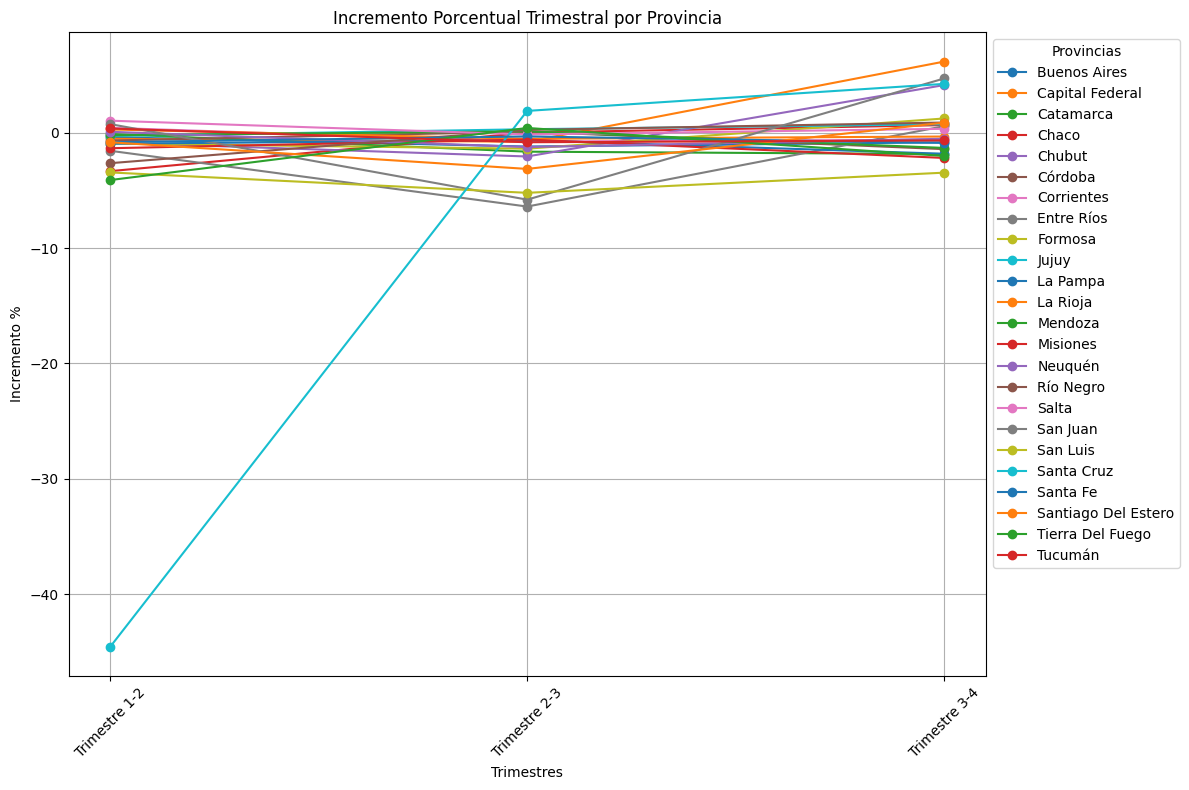

In [22]:
# df_incremento es nuestro DataFrame con los resultados

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada provincia y graficar los incrementos
for provincia in df_incremento['Provincia']:
    # Filtrar los datos de la provincia actual
    df_provincia = df_incremento[df_incremento['Provincia'] == provincia]
    
    # Extraer los incrementos
    incrementos = df_provincia[['Incremento_1_a_2', 'Incremento_2_a_3', 'Incremento_3_a_4']].values.flatten()
    
    # Crear un índice de trimestres para el gráfico
    trimestres = ['Trimestre 1-2', 'Trimestre 2-3', 'Trimestre 3-4']
    
    # Graficar la línea para la provincia actual
    plt.plot(trimestres, incrementos, marker='o', label=provincia)

# Configurar el gráfico
plt.title('Incremento Porcentual Trimestral por Provincia')
plt.xlabel('Trimestres')
plt.ylabel('Incremento %')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Provincias')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


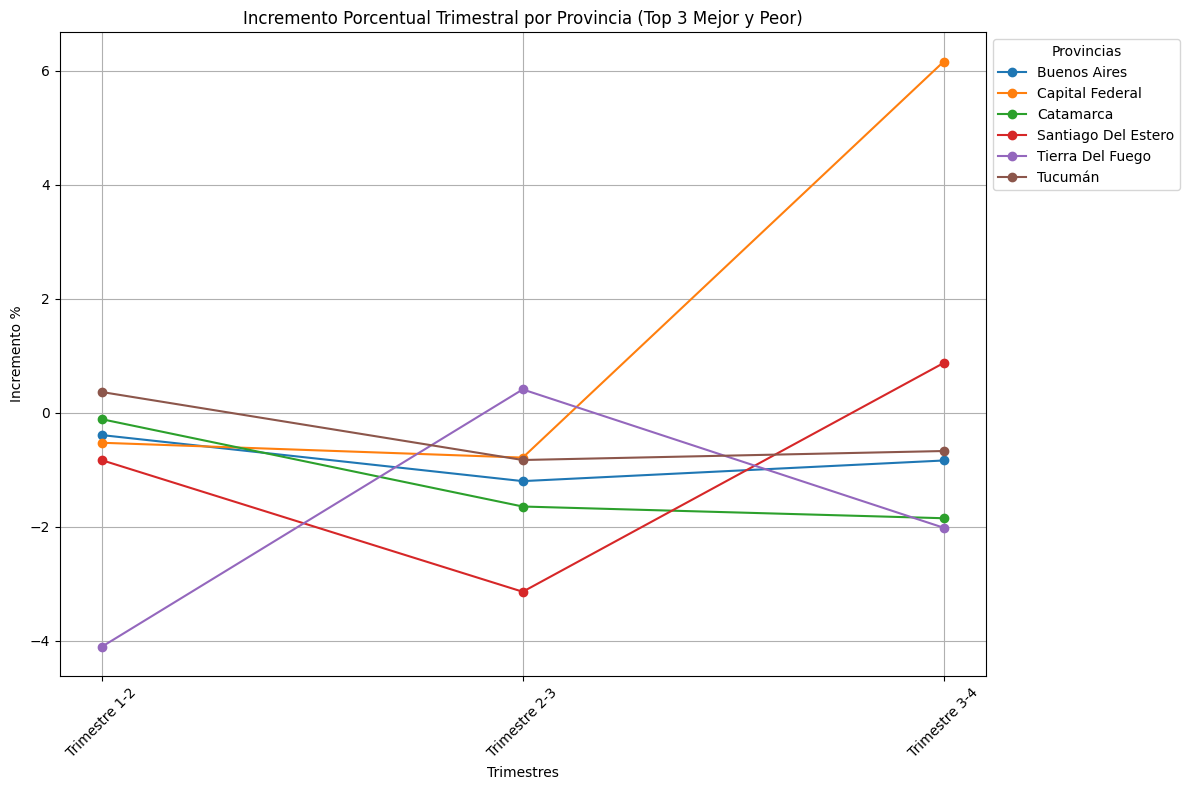

In [26]:
# Filtrar el top 3 de provincias con mayor incremento
top_3_incremento = df_incremento.head(3)

# Filtrar el top 3 de provincias con menor incremento
bottom_3_incremento = df_incremento.tail(3)

# Combinar ambos DataFrames
df_top_bottom_incremento = pd.concat([top_3_incremento, bottom_3_incremento])

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada provincia y graficar los incrementos
for provincia in df_top_bottom_incremento['Provincia']:
    # Filtrar los datos de la provincia actual
    df_provincia = df_top_bottom_incremento[df_top_bottom_incremento['Provincia'] == provincia]
    
    # Extraer los incrementos
    incrementos = df_provincia[['Incremento_1_a_2', 'Incremento_2_a_3', 'Incremento_3_a_4']].values.flatten()
    
    # Crear un índice de trimestres para el gráfico
    trimestres = ['Trimestre 1-2', 'Trimestre 2-3', 'Trimestre 3-4']
    
    # Graficar la línea para la provincia actual
    plt.plot(trimestres, incrementos, marker='o', label=provincia)

# Configurar el gráfico
plt.title('Incremento Porcentual Trimestral por Provincia (Top 3 Mejor y Peor)')
plt.xlabel('Trimestres')
plt.ylabel('Incremento %')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Provincias')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



## Comportamientos Generales:

La mayoría de las provincias presentan variabilidad en los incrementos porcentuales a lo largo de los trimestres del 2023. Esta variabilidad puede deberse a cambios en la demanda de servicios, políticas gubernamentales, o fluctuaciones en la infraestructura y disponibilidad de servicios de telecomunicaciones. El análisis de los incrementos porcentuales trimestrales sugiere que mientras algunas provincias experimentan fluctuaciones significativas, otras muestran una tendencia más estable, ya sea en términos de crecimiento o decrecimiento. Estas variaciones pueden proporcionar información valiosa sobre el comportamiento del mercado y las necesidades de intervención para mejorar o estabilizar los servicios en ciertas áreas.

### Tendencia Negativa en Muchos Casos
Muchas provincias muestran decrementos en la mayoría de los trimestres, lo que sugiere una posible disminución en la penetración o uso de los servicios medidos en esos períodos.

### Buenos Aires:
Muestra decrementos continuos en todos los trimestres, aunque no son tan pronunciados. Esto podría indicar una leve reducción en la adopción de los servicios, o una estabilización después de un período de crecimiento.

### Capital Federal:
Tiene un comportamiento interesante, con una disminución en los primeros dos trimestres seguida de un incremento significativo en el tercer trimestre. Esto podría sugerir la implementación de nuevas tecnologías o promociones que incentivaron el uso de los servicios.


### Provincias con Mayor Incremento en el Último Trimestre:

Capital Federal, Chubut, y Santa Cruz, estas provincias mostraron un incremento notable en el tercer trimestre. Esto podría ser indicativo de mejoras en la infraestructura, campañas de marketing efectivas, o aumentos en la demanda.

### Provincias con Menor Incremento (o Decremento) Sostenido:

Entre Ríos, San Luis, Santa Cruz, estas provincias mostraron las mayores caídas, lo cual podría ser una señal de problemas estructurales o económicos que afectan la adopción de los servicios, o un reflejo de la saturación del mercado en esas áreas.

In [29]:
# KPI 2

# Cargar la hoja "Velocidad % por prov" en un DataFrame
df_velocidad = pd.read_excel("data/Internet.xlsx", sheet_name="Velocidad % por prov")

# Cargar la hoja "Accesos Por Tecnología" en otro DataFrame
df_accesos_tecnologia = pd.read_excel("data/Internet.xlsx", sheet_name="Accesos Por Tecnología")

# Imprimir 10 filas al azar del DataFrame df_velocidad
print("Muestra de 10 filas de df_velocidad:")
print(df_velocidad.sample(10))

# Imprimir 10 filas al azar del DataFrame df_accesos_tecnologia
print("\nMuestra de 10 filas de df_accesos_tecnologia:")
print(df_accesos_tecnologia.sample(10))



Muestra de 10 filas de df_velocidad:
      Año  Trimestre        Provincia  Mbps (Media de bajada)
395  2020          1         La Rioja                7.962419
157  2022          3         Misiones               49.300000
378  2020          2         San Luis               21.020627
851  2015          2         La Rioja                4.001551
402  2020          1         San Luis               20.989380
331  2020          4       Santa Cruz                7.492109
826  2015          3         La Pampa                2.914932
61   2023          3         Misiones               91.490000
156  2022          3          Mendoza               34.160000
505  2018          4  Capital Federal               22.935302

Muestra de 10 filas de df_accesos_tecnologia:
        Año Trimestre   Provincia      ADSL  Cablemodem  Fibra óptica  \
488  2019 *       1 *     Formosa   22570.0      7878.0         940.0   
540    2018         3     Mendoza  151033.0     40205.0        5744.0   
362    2020    

In [32]:

# Ajustar la configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame completo
df_accesos_tecnologia



,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:

# Eliminar filas con datos nulos
df_accesos_tecnologia_limpio = df_accesos_tecnologia.dropna()

# Filtrar filas del año 2023
df_2023 = df_accesos_tecnologia[df_accesos_tecnologia['Año'] == 2023]

# Verificar filas del año 2023 con datos nulos
nulos_2023 = df_2023[df_2023.isnull().any(axis=1)]

# Informe de datos nulos para el año 2023
if not nulos_2023.empty:
    print("Filas con datos nulos en el año 2023:")
    print(nulos_2023)
else:
    print("No hay datos nulos en las filas del año 2023.")

# Si quieres guardar el DataFrame limpio en un nuevo archivo
df_accesos_tecnologia_limpio.to_excel("data/Internet_limpio.xlsx", index=False)


No hay datos nulos en las filas del año 2023.


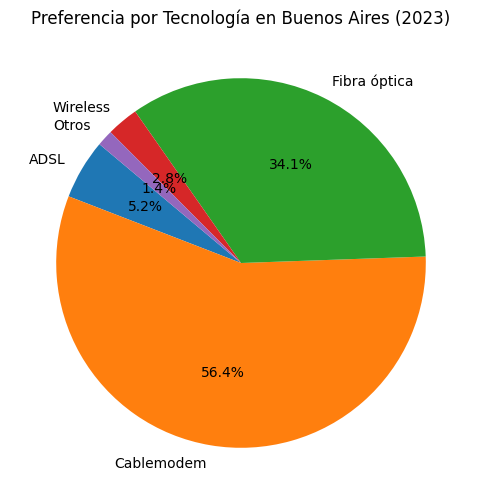

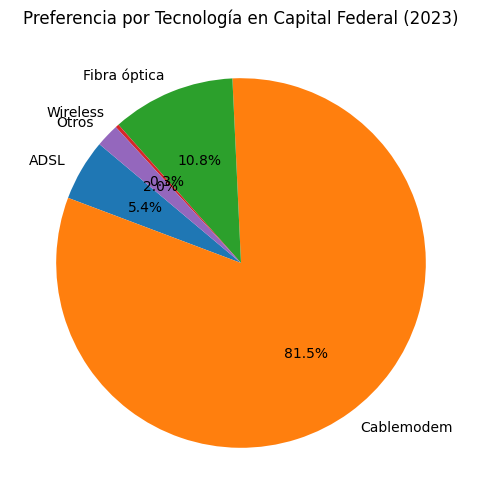

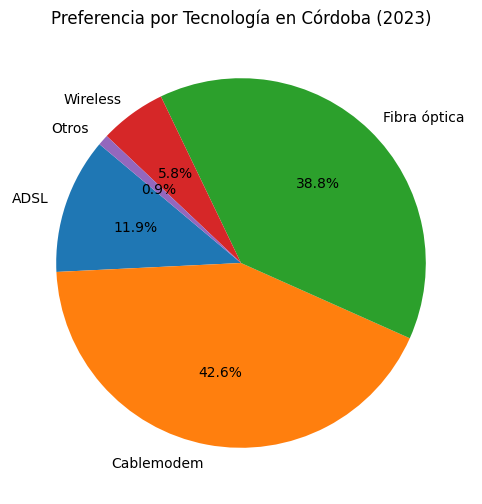

In [35]:

# Filtrar datos para el año 2023
df_2023_at = df_accesos_tecnologia[df_accesos_tecnologia['Año'] == 2023]

# Filtrar las 3 provincias con más registros en la columna 'Total' en el año 2023
top_provincias = df_2023.groupby('Provincia')['Total'].sum().nlargest(3).index

# Crear gráficos de torta para cada una de las provincias
for provincia in top_provincias:
    # Filtrar los datos para la provincia en el año 2023
    df_provincia = df_2023[df_2023['Provincia'] == provincia]
    
    # Sumar los valores de cada tecnología para la provincia
    suma_tecnologias = df_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
    
    # Crear el gráfico de torta
    plt.figure(figsize=(8, 6))
    plt.pie(suma_tecnologias, labels=suma_tecnologias.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Preferencia por Tecnología en {provincia} (2023)')
    plt.show()


## Anàlisis
El cable módem predomina en cantidad en todas las provincias debido a una combinación de factores como la infraestructura establecida y económica, una cobertura amplia, costos accesibles para los consumidores, y un rendimiento adecuado para la mayoría de las necesidades. Además, las barreras económicas y la resistencia al cambio contribuyen a que el cable módem siga siendo una opción dominante en muchas regiones.


### Velocidades Suficientes: 
Las velocidades ofrecidas por el cable módem suelen ser adecuadas para las necesidades diarias de la mayoría de los usuarios, incluyendo navegación web, streaming y trabajo desde casa. Esto hace que muchos usuarios no sientan una necesidad urgente de cambiar a tecnologías más rápidas.

### Fiabilidad y Estabilidad: 
El cable módem proporciona una conexión estable y confiable, que puede ser suficiente para la mayoría de los usuarios. La fiabilidad en el servicio es un factor importante para mantener la preferencia por esta tecnología.

/tmp/ipykernel_15598/2489380826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Trimestre'] = df_2023['Trimestre'].astype(int)


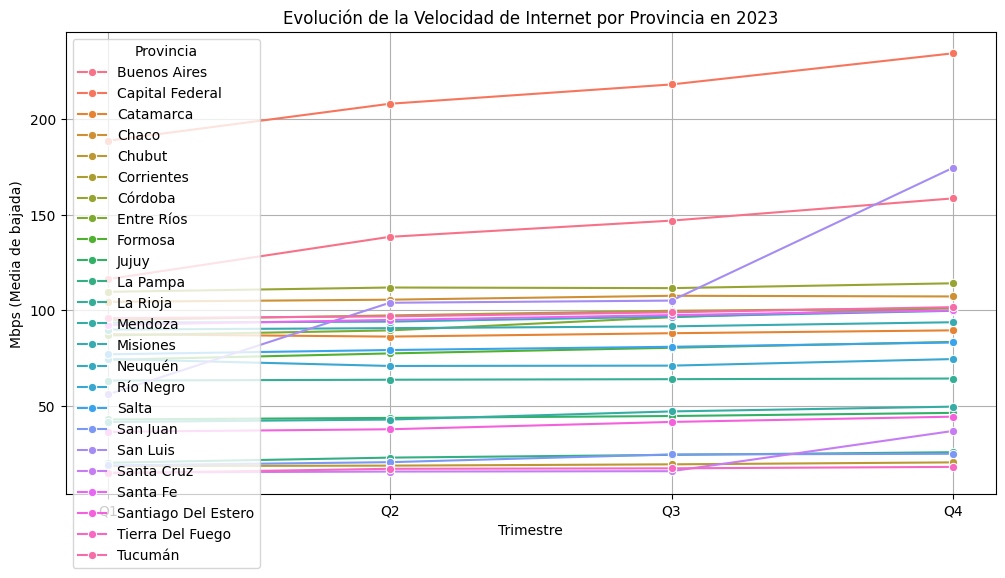

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el año 2023
df_2023 = df_velocidad[df_velocidad['Año'] == 2023]
df_2023['Trimestre'] = df_2023['Trimestre'].astype(int)

# Ordenamos los datos por provincia y trimestre
df_2023 = df_2023.sort_values(by=['Provincia', 'Trimestre'])

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2023, x='Trimestre', y='Mbps (Media de bajada)', hue='Provincia', marker='o')

plt.title('Evolución de la Velocidad de Internet por Provincia en 2023')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.show()


## Provincias con Mejores Velocidades

/tmp/ipykernel_15598/1663917612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Trimestre'] = df_2023['Trimestre'].astype(int)


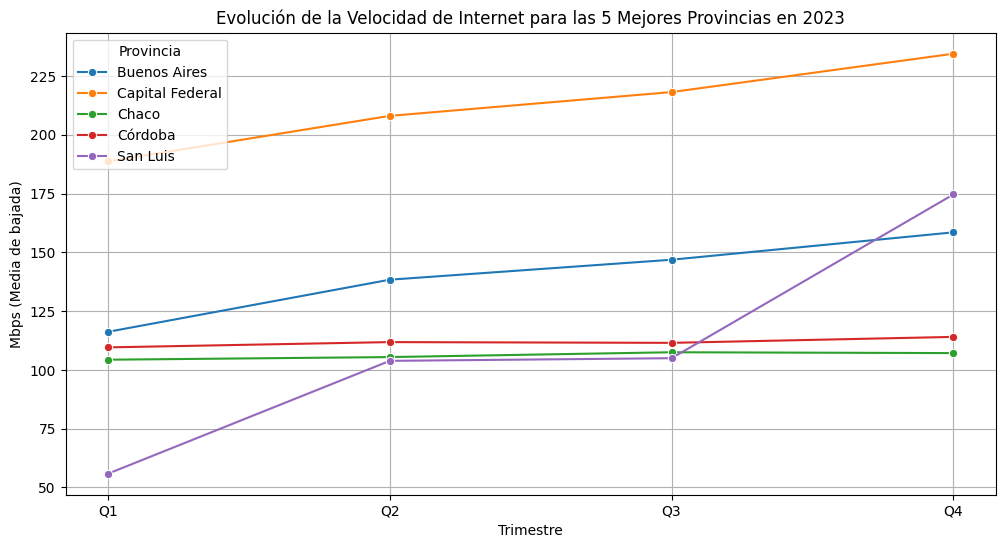

In [38]:


# Filtramos los datos para el año 2023
df_2023 = df_velocidad[df_velocidad['Año'] == 2023]
df_2023['Trimestre'] = df_2023['Trimestre'].astype(int)

# Calculamos la velocidad promedio de bajada por provincia
avg_speeds = df_2023.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Seleccionamos las 5 provincias con las mejores velocidades
top_5_provincias = avg_speeds.nlargest(5).index

# Filtra los datos para las 5 provincias seleccionadas
df_top_5 = df_2023[df_2023['Provincia'].isin(top_5_provincias)]

# Crea el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_5, x='Trimestre', y='Mbps (Media de bajada)', hue='Provincia', marker='o')

plt.title('Evolución de la Velocidad de Internet para las 5 Mejores Provincias en 2023')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title='Provincia', loc='upper left')
plt.grid(True)
plt.show()


In [40]:


# Filtra los datos para el año 2023 y el último trimestre
df_ultimo_trimestre_2023 = df_velocidad[(df_velocidad['Año'] == 2023) & (df_velocidad['Trimestre'] == 4)]

# Calcula la velocidad promedio de bajada por provincia en el último trimestre
avg_speeds_ultimo_trimestre = df_ultimo_trimestre_2023.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Selecciona las provincias con velocidades promedio mayores a 150 Mbps
provincias_mayores_150_ultimo_trimestre = avg_speeds_ultimo_trimestre[avg_speeds_ultimo_trimestre > 150]

# Muestra las provincias y sus velocidades promedio en el último trimestre
print("Provincias con velocidad promedio de bajada superior a 150 Mbps en el último trimestre de 2023:")
print(provincias_mayores_150_ultimo_trimestre)


Provincias con velocidad promedio de bajada superior a 150 Mbps en el último trimestre de 2023:
Provincia
Buenos Aires       158.49
Capital Federal    234.44
San Luis           174.59
Name: Mbps (Media de bajada), dtype: float64


## Factores que Contribuyen a la Alta Calidad de Internet en Buenos Aires, Capital Federal y San Luis

### 1. Infraestructura de Red Avanzada:

Inversiones en Tecnología: Estas provincias han realizado inversiones significativas en infraestructura de red, incluyendo la expansión de redes de fibra óptica y la modernización de redes de cable módem. La infraestructura avanzada permite ofrecer velocidades más altas y una mejor calidad de servicio.

Cobertura de Fibra Óptica: La disponibilidad de fibra óptica en áreas urbanas y en desarrollo, como Buenos Aires y Capital Federal, contribuye a mayores velocidades de internet debido a la capacidad superior de esta tecnología para manejar grandes volúmenes de datos.

### 2. Concentración de Proveedores de Servicios:
Competencia: En áreas metropolitanas como Buenos Aires y Capital Federal, la alta competencia entre proveedores de servicios de internet puede llevar a mejoras en la calidad del servicio. Los proveedores a menudo invierten en infraestructura y tecnologías avanzadas para atraer y retener clientes.

Diversidad de Opciones: La presencia de múltiples proveedores permite a los consumidores elegir servicios de alta calidad, lo que puede impulsar a los proveedores a mejorar sus ofertas para mantenerse competitivos.

### 3. Demanda y Economía:
Alta Demanda de Servicios: Las provincias con alta densidad de población y actividad económica, como Buenos Aires y Capital Federal, tienen una mayor demanda de servicios de internet de alta velocidad. Los proveedores responden a esta demanda ofreciendo velocidades más altas y mejores servicios.

Capacidad Económica: Las áreas con economías más robustas tienen más recursos para invertir en tecnología avanzada. Esto se traduce en una infraestructura de red más moderna y capacidades de internet superiores.

### 4. Desarrollo Urbano y Tecnológico:
Inversión en Desarrollo Urbano: Las provincias que han experimentado un desarrollo urbano significativo y un crecimiento tecnológico suelen tener mejor infraestructura de red. Buenos Aires y Capital Federal, siendo grandes centros urbanos, han avanzado en este sentido.

Innovación y Tecnología: La presencia de centros tecnológicos y empresas en estas provincias puede fomentar la adopción de nuevas tecnologías y la mejora continua de los servicios de internet.

### 5. Acceso a Recursos y Apoyo Institucional:
Recursos Federales y Locales: A veces, las provincias que tienen acceso a recursos federales y locales destinados a la mejora de la infraestructura tecnológica pueden beneficiarse de inversiones adicionales en redes de alta velocidad.

Programas de Modernización: Iniciativas gubernamentales y programas de modernización de infraestructura pueden haber sido implementados en estas provincias para mejorar la calidad del internet.

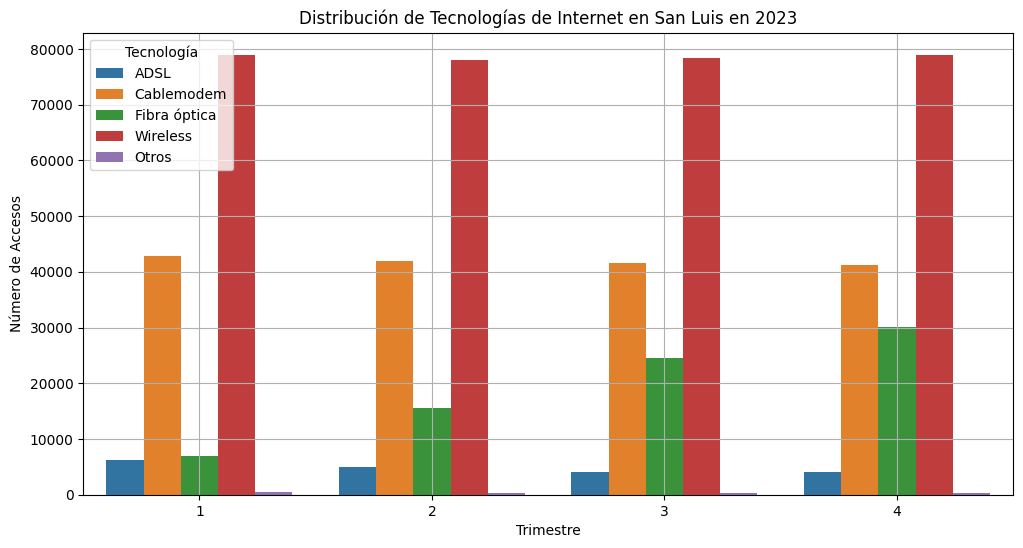

Velocidad promedio en el primer trimestre de 2023: 55.85 Mbps
Velocidad promedio en el último trimestre de 2023: 174.59 Mbps
Aumento en velocidad promedio: 118.74 Mbps
Aumento porcentual en velocidad promedio: 212.61%


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Distribución por Tecnología en San Luis en 2023

# Filtra los datos para la provincia de San Luis en 2023
df_san_luis_2023 = df_accesos_tecnologia[(df_accesos_tecnologia['Provincia'] == 'San Luis') & (df_accesos_tecnologia['Año'] == 2023)]

# Calcula la distribución por tecnología
df_san_luis_2023_melt = df_san_luis_2023.melt(id_vars=['Trimestre'], 
                                             value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], 
                                             var_name='Tecnología', 
                                             value_name='Accesos')

# Crea el gráfico de distribución por tecnología
plt.figure(figsize=(12, 6))
sns.barplot(data=df_san_luis_2023_melt, x='Trimestre', y='Accesos', hue='Tecnología')
plt.title('Distribución de Tecnologías de Internet en San Luis en 2023')
plt.xlabel('Trimestre')
plt.ylabel('Número de Accesos')
plt.legend(title='Tecnología', loc='upper left')
plt.grid(True)
plt.show()

# Paso 2: Aumento en Velocidad Promedio desde el Primer al Último Trimestre en 2023

# Filtramos los datos para el primer y último trimestre de 2023
df_san_luis_2023_q1 = df_velocidad[(df_velocidad['Provincia'] == 'San Luis') & 
                                    (df_velocidad['Año'] == 2023) & 
                                    (df_velocidad['Trimestre'] == 1)]
df_san_luis_2023_q4 = df_velocidad[(df_velocidad['Provincia'] == 'San Luis') & 
                                    (df_velocidad['Año'] == 2023) & 
                                    (df_velocidad['Trimestre'] == 4)]

# Calcula la velocidad promedio para ambos trimestres
velocidad_promedio_q1 = df_san_luis_2023_q1['Mbps (Media de bajada)'].mean()
velocidad_promedio_q4 = df_san_luis_2023_q4['Mbps (Media de bajada)'].mean()

# Calcula el aumento en velocidad promedio
aumento_velocidad = velocidad_promedio_q4 - velocidad_promedio_q1
porcentaje_aumento = (aumento_velocidad / velocidad_promedio_q1) * 100

# Muestra los resultados
print(f"Velocidad promedio en el primer trimestre de 2023: {velocidad_promedio_q1:.2f} Mbps")
print(f"Velocidad promedio en el último trimestre de 2023: {velocidad_promedio_q4:.2f} Mbps")
print(f"Aumento en velocidad promedio: {aumento_velocidad:.2f} Mbps")
print(f"Aumento porcentual en velocidad promedio: {porcentaje_aumento:.2f}%")


### Anàlisis 

El notable aumento en la velocidad promedio de internet en San Luis durante 2023, con un incremento de 118.74 Mbps y un aumento porcentual del 212.61%, está estrechamente vinculado a la expansión y adopción de la fibra óptica. La fibra óptica ha permitido una mejora significativa en las velocidades de internet, reduciendo la congestión y proporcionando una experiencia de usuario más estable y rápida. Este cambio refleja una inversión en infraestructura y una respuesta a la creciente demanda de servicios de alta velocidad.